In [1]:
import numpy as np
import torch
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt
from IPython import display
from torch import nn
import torchvision

In [2]:
train_dataset = torchvision.datasets.MNIST('../data/', train=True, download=True, transform=torchvision.transforms.ToTensor())

In [3]:
batch_size = 32
data_loader_train = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [4]:
class Krxk_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.ReLU(), nn.Linear(256, 10))
        def init_weight(m):
            if type(m) == nn.Linear:
                nn.init.normal_(m.weight, std=0.01)
        self.net.apply(init_weight)

    def forward(self, X):
        return self.net(X)

In [5]:
loss = nn.CrossEntropyLoss()

In [6]:
model = Krxk_model()
lr = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [7]:
# 测试
print(model.net)
for X, y in data_loader_train:
        print(X.shape, y.shape)
        y_hat = model.forward(X)
        res = y_hat.argmax(dim=1)
        print(y.shape)
        print( ((res == y)*torch.ones_like(y)).sum()/(y.shape[0]) )
        
        break

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32])
tensor(0.1562)


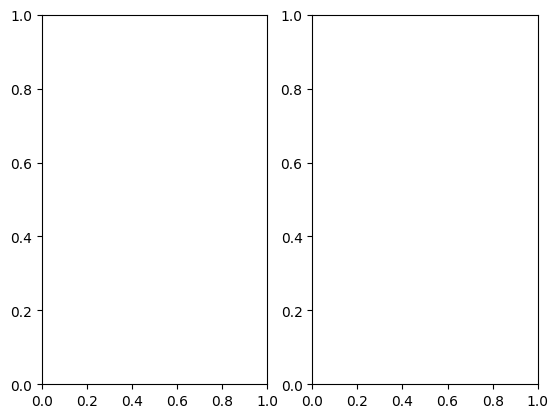

In [8]:
# 初始化绘图环境
fig, axes = plt.subplots(1, 2)

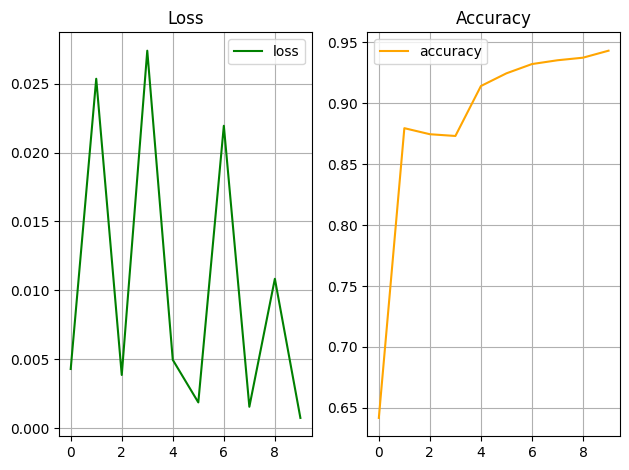

Epoch 9 Loss: 0.0007454621372744441
Epoch 9 Accuracy: 0.9431000351905823
Finished


In [9]:
%time
epochs = 10
device = 'cuda' if torch.cuda.device_count()>0 else 'cpu'

epoch_loss = []
accuracy = []

print('训练设备：', device)

model.to(device)
for epoch in range(epochs):
    pre_true = 0
    pre_total = 0
    for X, y in data_loader_train:
        X, y = X.to(device), y.to(device)
        y_hat = model.forward(X)
        
        # 计算精确度
        pre_label = y_hat.argmax(dim=1)
        pre_true += ((pre_label == y)* torch.ones_like(y)).sum()
        pre_total += y.shape[0]
        
        l = loss(y_hat, y)/batch_size
        l.backward()
        optimizer.step()
    
    epoch_loss.append(l.cpu().detach().numpy())
    accuracy.append((pre_true/pre_total).cpu().detach().numpy())
    
    for ax in axes:
        ax.cla() # 清空绘图缓存
        
    axes[0].plot(range(epoch+1), epoch_loss, 'green',label='loss')
    axes[1].plot(range(epoch+1), accuracy, 'orange',label='accuracy')
    display.clear_output(wait=True) # 清空上一步输出

    axes[0].set_title('Loss')
    axes[1].set_title('Accuracy')
    for ax in axes:
        ax.grid()
        ax.legend()

    fig.tight_layout()
    display.display(fig)
    
    print(f'Epoch {epoch} Loss: {l}')
    print(f'Epoch {epoch} Accuracy: {accuracy[-1]}')

print('Finished')

In [10]:
# 保存
torch.save(model.state_dict(), './hw_2-MINIST(mlp).bin')